In [10]:
##classification



In [34]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [35]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [36]:
mnist.train.labels

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [37]:
mnist.train.images.shape

(55000, 784)

In [38]:
mnist.train.labels.shape

(55000,)

In [39]:
image_of_numbr_25k_row= mnist.train.images[25000].reshape(28,28)

In [40]:
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline


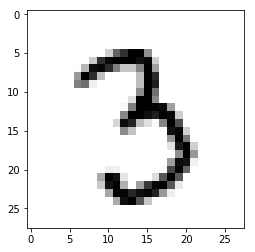

In [41]:
plt.imshow(image_of_numbr_25k_row, cmap=matplotlib.cm.binary, interpolation='nearest')

In [42]:
mnist.train.labels[25000]

3

In [43]:
X_train= mnist.train.images

In [44]:
X_train.shape

(55000, 784)

In [45]:
y_train = mnist.train.labels

In [46]:
y_train.shape

(55000,)

In [51]:
#test data
X_test= mnist.test.images

In [52]:
y_test = mnist.test.labels

In [53]:
y_test.shape

(10000,)

In [ ]:
#binary classifier 

#the model will classify a 5  and others as not 5. so just 2 classes. binary classifier

In [54]:
##creating a true or false target vector for classification (we dont want numerical values, 
#its the class either 5 (True) or not)

array([False, False, False, ...,  True, False, False], dtype=bool)

In [55]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [56]:
y_train_5 = (y_train == 5)

In [57]:
y_train_5

array([False, False, False, ...,  True, False, False], dtype=bool)

In [58]:
y_test 

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [59]:
y_test_5 = (y_test == 5) 

In [60]:
y_test_5

array([False, False, False, ..., False,  True, False], dtype=bool)

In [61]:
from sklearn.linear_model import SGDClassifier

In [62]:
sgd_class= SGDClassifier(random_state = 42)

In [63]:
sgd_class.fit(X_train, y_train_5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [65]:
predict_5= sgd_class.predict(Y_test)

In [66]:
predict_5

array([False, False, False, ..., False,  True, False], dtype=bool)

In [ ]:
###evaluation

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
cross_val_score(sgd_class, X_train, y_train_5, cv =3, scoring= "accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

array([ 0.96280135,  0.96449026,  0.96689031])

In [69]:
y_train_5

array([False, False, False, ...,  True, False, False], dtype=bool)

In [75]:
import pandas as pd

y_train_5_series= pd.Series(y_train_5, name= "y_train_series")

In [78]:
c = y_train_5_series[y_train_5_series == True]

In [80]:
len(c)

4987

In [81]:
len(y_train_5_series)

55000

In [83]:
1- len(c)/len(y_train_5_series)

0.9093272727272728

In [ ]:
## confusion matrix needs prediction, lets take predictions from cross_val_predict()

In [85]:
from sklearn.model_selection import cross_val_predict

In [87]:
y_train_predict = cross_val_predict(sgd_class, X_train, y_train_5, cv =3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

In [88]:
y_train_predict

array([False, False, False, ...,  True, False, False], dtype=bool)

In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(y_train_5, y_train_predict)

array([[48993,  1020],
       [  920,  4067]], dtype=int64)

In [91]:
from sklearn.metrics import precision_score, recall_score

In [92]:
precision_score(y_train_5, y_train_predict)

0.79948889325732264

In [93]:
recall_score(y_train_5, y_train_predict)

0.81552035291758573

In [95]:
from sklearn.metrics import f1_score

In [96]:
f1_score(y_train_5, y_train_predict)

0.80742505459598968

In [97]:
y_scores= cross_val_predict(sgd_class, X_train, y_train_5, cv = 3, method= "decision_function")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

In [100]:
y_scores

array([-21.50965798, -11.14299672,  -5.54652251, ...,   8.93326746,
        -5.63324601,  -6.26863212])

In [101]:
from sklearn.metrics import precision_recall_curve

In [103]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [112]:
precisions

array([ 0.09131358,  0.09129694,  0.09129862, ...,  1.        ,
        1.        ,  1.        ])

In [113]:
recalls

array([  1.00000000e+00,   9.99799479e-01,   9.99799479e-01, ...,
         4.01042711e-04,   2.00521356e-04,   0.00000000e+00])

In [114]:
thresholds

array([-34.88752186, -34.88560092, -34.8692022 , ...,  20.02615628,
        21.36678769,  23.19394951])

In [105]:
precisions.shape

(54615,)

In [107]:
recalls.shape

(54615,)

In [108]:
thresholds.shape

(54614,)

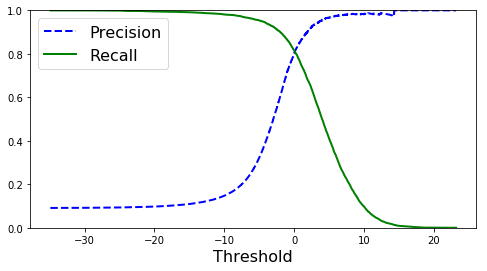

In [115]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
##plt.xlim([-700000, 700000])
plt.show()

In [116]:
y_scores

array([-21.50965798, -11.14299672,  -5.54652251, ...,   8.93326746,
        -5.63324601,  -6.26863212])

In [126]:
threshold = 8

In [127]:
y_train_predict_90 = (y_scores> threshold)

In [118]:
y_scores > 15

array([False, False, False, ..., False, False, False], dtype=bool)

In [119]:
y_train_5

array([False, False, False, ...,  True, False, False], dtype=bool)

In [128]:
precision_score(y_train_5, y_train_predict_90)

0.98395185556670006

In [129]:
recall_score (y_train_5, y_train_predict_90)

0.19671144976940044

In [130]:
from sklearn.metrics import roc_curve

In [131]:
fpr, tpr, thresholds= roc_curve(y_train_5, y_scores)

In [134]:
fpr.shape

(2841,)

In [135]:
tpr.shape

(2841,)

In [138]:
thresholds.shape

(2841,)

NameError: name 'save_fig' is not defined

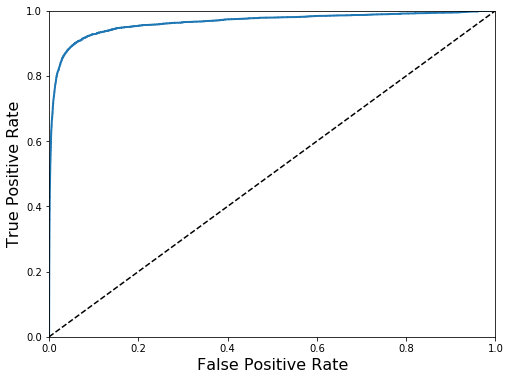

In [139]:


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()



In [140]:
from sklearn.metrics import roc_auc_score

In [141]:
roc_auc_score(y_train_5, y_scores)

0.96414969805865314

In [ ]:
#random forest class

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rf_cls= RandomForestClassifier(random_state=42)

In [144]:
y_train_prob=cross_val_predict(rf_cls, X_train, y_train_5, cv =3, method = "predict_proba")

In [146]:
y_train_prob.shape

(55000, 2)

In [147]:
y_train_prob

array([[ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       ..., 
       [ 0.1,  0.9],
       [ 0.9,  0.1],
       [ 0.8,  0.2]])

In [148]:
y_train_prob_scores = y_train_prob[:,1]

In [150]:
y_train_prob_scores.shape

(55000,)

In [152]:
fpr_f, tpr_f, thresholds_f= roc_curve(y_train_5, y_train_prob_scores)

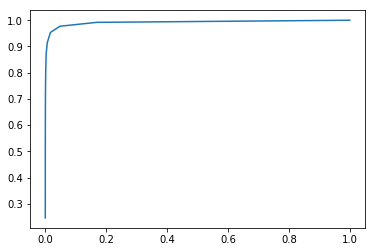

In [153]:
plt.plot(fpr_f, tpr_f)

In [167]:
roc_auc_score(y_train_5, y_train_prob_scores)

0.99198744720998566

In [157]:
y_forst_train_pred= cross_val_predict(rf_cls, X_train, y_train_5, cv= 3)

In [158]:
precision_score(y_train_5, y_forst_train_pred)

0.98330058939096265

In [159]:
recall_score(y_train_5, y_forst_train_pred)

0.80288750751955085

In [164]:
precision_score(y_train_5, y_forst_train_pred)

0.98330058939096265

In [168]:
#roc_auc_score(y_train_5, y_forst_train_pred)

0.90076393051381942

In [160]:
y_train_5

array([False, False, False, ...,  True, False, False], dtype=bool)

In [161]:
y_train_prob_scores

array([ 0. ,  0. ,  0. , ...,  0.9,  0.1,  0.2])

In [162]:
y_train_predict

array([False, False, False, ...,  True, False, False], dtype=bool)

In [ ]:
##mutli class

In [171]:
sgd_class.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [175]:
some_digit= X_train[0]

In [ ]:
some_digit= some_digit.reshape(1,-1)

In [177]:
some_digit_label = y_train[0]

In [185]:
sgd_class.predict(some_digit)

array([7], dtype=uint8)

In [187]:
X_train[0].shape

(784,)

In [184]:
##

In [188]:
sgd_class.decision_function(some_digit)

array([[-45.35799702, -21.23607434,  -0.8646408 , -11.03114781,
         -8.92647715, -19.92235337, -21.50101668,   4.39936267,
        -15.70096186, -11.59285569]])

In [ ]:
#eval

In [189]:
cross_val_score(sgd_class, X_train, y_train, cv = 3, scoring= "accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

array([ 0.88585919,  0.88741613,  0.86410256])

In [194]:
##scaling input for improved accuracy

import numpy as np

In [195]:
from sklearn.preprocessing import StandardScaler

In [196]:
scalar_1= StandardScaler()

In [199]:
X_trained_scaled= scalar_1.fit_transform(X_train.astype(np.float64))

In [202]:
cross_val_score(sgd_class,X_trained_scaled, y_train, cv = 3, scoring= "accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

array([ 0.90598244,  0.90776196,  0.91260229])

In [ ]:
## error analysis 

In [203]:
y_train_full_predict= cross_val_predict(sgd_class, X_trained_scaled, y_train, cv = 3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

In [207]:
cf_mt= confusion_matrix(y_train, y_train_full_predict)

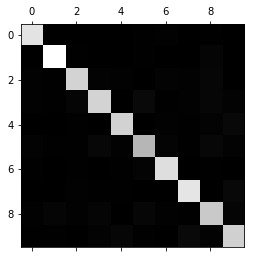

In [208]:
plt.matshow(cf_mt, cmap = plt.cm.gray)